# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# EDA

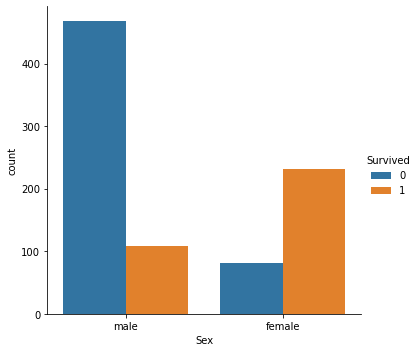

In [17]:
eda = pd.read_csv("train.csv")

sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

### Inference

Just by observing the graph, it can be approxiated that:
- The survival of men is arond 20% while women is 75%
- weather a passenger is male or female plays an important role in determinig if one is going to survive

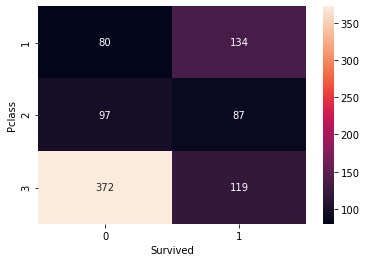

In [19]:

# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")


### Inference
- It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa.

- Class 1 passengers have a higher survival chance compared to classes 2 and 3.
- It implies that Pclass contributes a lot to a passenger’s survival rate.



# Cleaning the  Data

In [2]:
titanic1 = pd.read_csv("train.csv")
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = pd.read_csv("train.csv")

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
Encode = preprocessing.LabelEncoder()

In [6]:
titanic["Sex"] = Encode.fit_transform(titanic["Sex"])
titanic["Embarked"] = Encode.fit_transform(titanic["Embarked"])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


# Random Forest

In [23]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features = 2, oob_score=True)
features = ["Sex", "Pclass", "SibSp", "Fare", "Embarked", "Age"]
rf_model.fit(titanic[features],titanic["Survived"])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [8]:
print("OOB Accuracy: ")
print(rf_model.oob_score_)

OOB Accuracy: 
0.8098987626546682


In [9]:
for feature,imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

Sex 0.2697604193829583
Pclass 0.08856279081263972
SibSp 0.051907913179853556
Fare 0.2860558318493844
Embarked 0.033987623948937666
Age 0.26972542082622636


# Training

In [24]:
predictors = pd.DataFrame([titanic["Sex"], titanic["Age"], titanic["Fare"]]).T
tree_model = tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(predictors, titanic["Survived"])

DecisionTreeClassifier(max_depth=8)

In [25]:
tree_model.score(predictors,titanic["Survived"])

0.8706411698537683

- The accuracy had considerbly increased upon including only the important varibales after classifying with random forest

In [12]:
with open("Dtree.dot", "w") as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex", "Age", "Fare"], out_file=f)

# Testing

In [13]:
titanic_test1 = pd.read_csv("test.csv")
titanic_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [14]:
titanic_test = pd.read_csv("test.csv")
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_test["Sex"] = Encode.fit_transform(titanic_test["Sex"])
titanic_test["Embarked"] = Encode.fit_transform(titanic_test["Embarked"])

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [16]:
test_features = pd.DataFrame([titanic_test["Sex"],titanic_test["Embarked"]])

### The accuracy score increases while predicting on only the important columns